In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Kaushik-Varma/Marketing_Data_Analysis/master/Marketing_Analysis.csv')

C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

banking marketing Unnamed: 1                    Unnamed: 2 Unnamed: 3  \
0  customer id and age.        NaN  Customer salary and balance.        NaN   
1            customerid        age                        salary    balance   
2                     1         58                        100000       2143   
3                     2         44                         60000         29   
4                     3         33                        120000          2   

                                          Unnamed: 4              Unnamed: 5  \
0  Customer marital status and job with education...                     NaN   
1                                            marital                  jobedu   
2                                            married     management,tertiary   
3                                             single    technician,secondary   
4                                            married  entrepreneur,secondary   

                                   Unnamed: 6 Unnamed: 7  \
0  particular customer before targeted or not        NaN   
1                                    targeted    default   
2                                         yes         no   
3                                         yes         no   
4                                         yes         no   

                           Unnamed: 8 Unnamed: 9   Unnamed: 10 Unnamed: 11  \
0  Loan types: loans or housing loans        NaN  Contact type         NaN   
1                             housing       loan       contact         day   
2                                 yes         no       unknown           5   
3                                 yes         no       unknown           5   
4                                 yes        yes       unknown           5   

        Unnamed: 12       Unnamed: 13 Unnamed: 14 Unnamed: 15 Unnamed: 16  \
0  month of contact  duration of call         NaN         NaN         NaN   
1             month          duration    campaign       pdays    previous   
2         may, 2017           261 sec           1          -1           0   
3         may, 2017           151 sec           1          -1           0   
4         may, 2017            76 sec           1          -1           0   

                   Unnamed: 17                              Unnamed: 18  
0  outcome of previous contact  response of customer after call happned  
1                     poutcome                                 response  
2                      unknown                                       no  
3                      unknown                                       no  
4                      unknown                                       no

As the first two rows don't make sense, we are going to skip them

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Kaushik-Varma/Marketing_Data_Analysis/master/Marketing_Analysis.csv', skiprows = 2)

In [5]:
df.head()

customerid   age  salary  balance  marital                  jobedu  \
0           1  58.0  100000     2143  married     management,tertiary   
1           2  44.0   60000       29   single    technician,secondary   
2           3  33.0  120000        2  married  entrepreneur,secondary   
3           4  47.0   20000     1506  married     blue-collar,unknown   
4           5  33.0       0        1   single         unknown,unknown   

  targeted default housing loan  contact  day      month duration  campaign  \
0      yes      no     yes   no  unknown    5  may, 2017  261 sec         1   
1      yes      no     yes   no  unknown    5  may, 2017  151 sec         1   
2      yes      no     yes  yes  unknown    5  may, 2017   76 sec         1   
3       no      no     yes   no  unknown    5  may, 2017   92 sec         1   
4       no      no      no   no  unknown    5  may, 2017  198 sec         1   

   pdays  previous poutcome response  
0     -1         0  unknown       no  
1     -1         0  unknown       no  
2     -1         0  unknown       no  
3     -1         0  unknown       no  
4     -1         0  unknown       no

The current dataset has not been processed, so now we'll be doing pre-processing of the dataset

In [6]:
#Removing the column
df.drop('customerid', axis = 1, inplace = True)

In [7]:
df.head()

age  salary  balance  marital                  jobedu targeted default  \
0  58.0  100000     2143  married     management,tertiary      yes      no   
1  44.0   60000       29   single    technician,secondary      yes      no   
2  33.0  120000        2  married  entrepreneur,secondary      yes      no   
3  47.0   20000     1506  married     blue-collar,unknown       no      no   
4  33.0       0        1   single         unknown,unknown       no      no   

  housing loan  contact  day      month duration  campaign  pdays  previous  \
0     yes   no  unknown    5  may, 2017  261 sec         1     -1         0   
1     yes   no  unknown    5  may, 2017  151 sec         1     -1         0   
2     yes  yes  unknown    5  may, 2017   76 sec         1     -1         0   
3     yes   no  unknown    5  may, 2017   92 sec         1     -1         0   
4      no   no  unknown    5  may, 2017  198 sec         1     -1         0   

  poutcome response  
0  unknown       no  
1  unknown       no  
2  unknown       no  
3  unknown       no  
4  unknown       no

The column jobedu has two values, so it would be better to split both the values in new two columns

In [8]:
df['job']= df["jobedu"].apply(lambda x: x.split(",")[0])
df['education']= df["jobedu"].apply(lambda x: x.split(",")[1])

In [9]:
df.head()

age  salary  balance  marital                  jobedu targeted default  \
0  58.0  100000     2143  married     management,tertiary      yes      no   
1  44.0   60000       29   single    technician,secondary      yes      no   
2  33.0  120000        2  married  entrepreneur,secondary      yes      no   
3  47.0   20000     1506  married     blue-collar,unknown       no      no   
4  33.0       0        1   single         unknown,unknown       no      no   

  housing loan  contact  day      month duration  campaign  pdays  previous  \
0     yes   no  unknown    5  may, 2017  261 sec         1     -1         0   
1     yes   no  unknown    5  may, 2017  151 sec         1     -1         0   
2     yes  yes  unknown    5  may, 2017   76 sec         1     -1         0   
3     yes   no  unknown    5  may, 2017   92 sec         1     -1         0   
4      no   no  unknown    5  may, 2017  198 sec         1     -1         0   

  poutcome response           job  education  
0  unknown       no    management   tertiary  
1  unknown       no    technician  secondary  
2  unknown       no  entrepreneur  secondary  
3  unknown       no   blue-collar    unknown  
4  unknown       no       unknown    unknown

In [10]:
#Deleting the column jobedu
df.drop('jobedu', axis = 1, inplace = True)


In [11]:
df.head()

age  salary  balance  marital targeted default housing loan  contact  day  \
0  58.0  100000     2143  married      yes      no     yes   no  unknown    5   
1  44.0   60000       29   single      yes      no     yes   no  unknown    5   
2  33.0  120000        2  married      yes      no     yes  yes  unknown    5   
3  47.0   20000     1506  married       no      no     yes   no  unknown    5   
4  33.0       0        1   single       no      no      no   no  unknown    5   

       month duration  campaign  pdays  previous poutcome response  \
0  may, 2017  261 sec         1     -1         0  unknown       no   
1  may, 2017  151 sec         1     -1         0  unknown       no   
2  may, 2017   76 sec         1     -1         0  unknown       no   
3  may, 2017   92 sec         1     -1         0  unknown       no   
4  may, 2017  198 sec         1     -1         0  unknown       no   

            job  education  
0    management   tertiary  
1    technician  secondary  
2  entrepreneur  secondary  
3   blue-collar    unknown  
4       unknown    unknown

  Finding Missing values and eliminating them

In [12]:
#Finding missing values
df.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

In [13]:
df= df.dropna().copy()

In [14]:
df.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

As the dataset is very huge, lets slice it

In [15]:
df=df.iloc[:5000].copy()

# Details of the variable
age - The age of an individiual

salary - Salary of an individual

balance - balance of an individual

Marital - marital status of an individual

targeted - if the individual has been targeted or not

default - has credit in default? (categorical: 'no','yes','unknown')

housing -has housing loan? (categorical: 'no','yes','unknown')

loan - has personal loan? (categorical: 'no','yes','unknown')

contact - contact details of the individual

day,month - last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

duration - last contact duration

response - response for the marketing

campaign - number of contacts performed during this campaign and for this client

pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

previous: number of contacts performed before this campaign and for this client (numeric)

poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


job and education - individual's job and education


# The aim of marketing analysis is to understand the client's/individual's mindset and to prepare a strategy for success and also to generate money for the company 
 

salary groupwise 
job 
To determine the salary of people and splitting them into categories- 50k below and above
determining if the person is married or not will be useful to sell our products to improvise selling and growth of the co


In [16]:
from IPython.display import display

with pd.option_context('display.max_rows',10000):
    display(df)

age  salary  balance   marital targeted default housing loan  contact  \
0     58.0  100000     2143   married      yes      no     yes   no  unknown   
1     44.0   60000       29    single      yes      no     yes   no  unknown   
2     33.0  120000        2   married      yes      no     yes  yes  unknown   
3     47.0   20000     1506   married       no      no     yes   no  unknown   
4     33.0       0        1    single       no      no      no   no  unknown   
5     35.0  100000      231   married      yes      no     yes   no  unknown   
6     28.0  100000      447    single       no      no     yes  yes  unknown   
7     42.0  120000        2  divorced       no     yes     yes   no  unknown   
8     58.0   55000      121   married      yes      no     yes   no  unknown   
9     43.0   60000      593    single      yes      no     yes   no  unknown   
10    41.0   50000      270  divorced      yes      no     yes   no  unknown   
11    29.0   50000      390    single      yes      no     yes   no  unknown   
12    53.0   60000        6   married      yes      no     yes   no  unknown   
13    58.0   60000       71   married       no      no     yes   no  unknown   
14    57.0   70000      162   married      yes      no     yes   no  unknown   
15    51.0   55000      229   married      yes      no     yes   no  unknown   
16    45.0   50000       13    single       no      no     yes   no  unknown   
17    57.0   20000       52   married      yes      no     yes   no  unknown   
18    60.0   55000       60   married      yes      no     yes   no  unknown   
19    33.0   70000        0   married      yes      no     yes   no  unknown   
20    28.0   20000      723   married      yes      no     yes  yes  unknown   
21    56.0  100000      779   married      yes      no     yes   no  unknown   
22    32.0   20000       23    single      yes      no     yes  yes  unknown   
23    25.0   70000       50   married      yes      no     yes   no  unknown   
24    40.0   55000        0   married      yes      no     yes  yes  unknown   
25    44.0   50000     -372   married      yes      no     yes   no  unknown   
26    39.0  100000      255    single       no      no     yes   no  unknown   
27    52.0  120000      113   married      yes      no     yes  yes  unknown   
28    46.0  100000     -246    single      yes      no     yes   no  unknown   
29    36.0   60000      265    single      yes      no     yes  yes  unknown   
30    57.0   60000      839   married      yes      no      no  yes  unknown   
31    49.0  100000      378   married      yes      no     yes   no  unknown   
32    60.0   50000       39   married      yes      no     yes  yes  unknown   
33    59.0   20000        0   married      yes      no     yes   no  unknown   
34    51.0  100000    10635   married      yes      no     yes   no  unknown   
35    57.0   60000       63  divorced      yes      no     yes   no  unknown   
36    25.0   20000       -7   married      yes      no     yes   no  unknown   
37    53.0   60000       -3   married      yes      no      no   no  unknown   
38    36.0   50000      506  divorced      yes      no     yes   no  unknown   
39    37.0   50000        0    single      yes      no     yes   no  unknown   
40    44.0   70000     2586  divorced      yes      no     yes   no  unknown   
41    50.0  100000       49   married      yes      no     yes   no  unknown   
42    60.0   20000      104   married       no      no     yes   no  unknown   
43    54.0   55000      529   married      yes      no     yes   no  unknown   
44    58.0   55000       96   married       no      no     yes   no  unknown   
45    36.0   50000     -171    single      yes      no     yes   no  unknown   
46    58.0   60000     -364   married      yes      no     yes   no  unknown   
47    44.0   60000        0   married      yes      no     yes   no  unknown   
48    55.0   60000        0  divorced      yes      no      no   no  unknown   
49    2

In [17]:
df.describe()

age         salary       balance          day     campaign  \
count  5000.000000    5000.000000   5000.000000  5000.000000  5000.000000   
mean     40.396600   51454.600000    963.703600    12.408800     2.374000   
std       9.411048   31047.407736   2493.093733     5.027478     2.738252   
min      20.000000       0.000000  -3313.000000     5.000000     1.000000   
25%      33.000000   20000.000000     56.000000     8.000000     1.000000   
50%      40.000000   50000.000000    306.000000    13.000000     2.000000   
75%      47.000000   70000.000000    898.500000    16.000000     3.000000   
max      61.000000  120000.000000  58544.000000    21.000000    63.000000   

        pdays  previous  
count  5000.0    5000.0  
mean     -1.0       0.0  
std       0.0       0.0  
min      -1.0       0.0  
25%      -1.0       0.0  
50%      -1.0       0.0  
75%      -1.0       0.0  
max      -1.0       0.0

How has targeting the clients benefited?

In [18]:
df.targeted.unique()

array(['yes', 'no'], dtype=object)

In [19]:
yes_df = df[df.targeted=='yes']
no_df = df[df.targeted=='no']

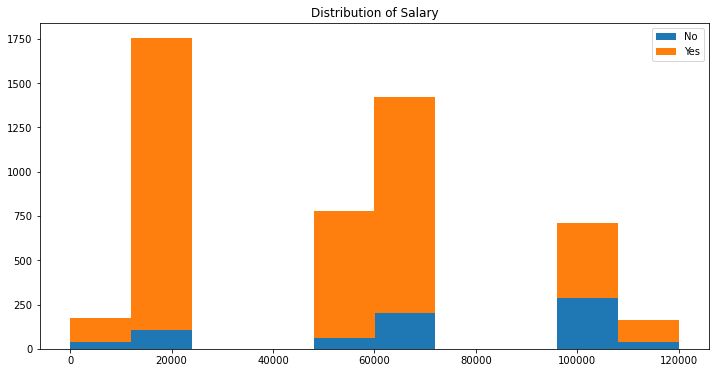

In [20]:
plt.figure(figsize=(12, 6))
plt.title('Distribution of Salary')

plt.hist([no_df.salary, yes_df.salary], 
         stacked=True);

plt.legend(['No','Yes']);

From the previous graph we can understand that, when the company does not target clients, it is very less likely to find client's who earn median salary.



Which day of campaign has proven to be successful in contacting clients with good salary?

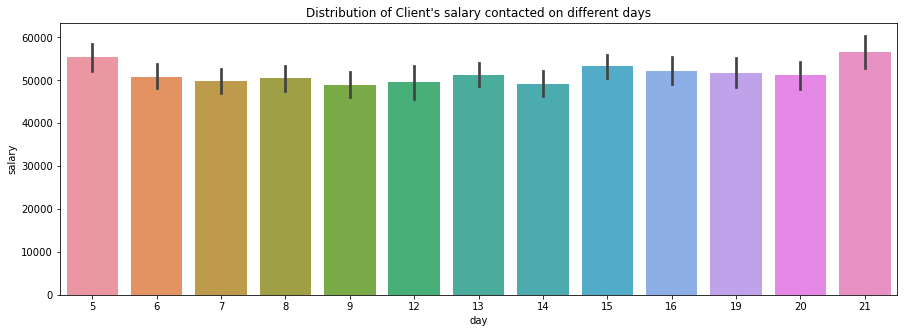

In [21]:
plt.figure(figsize=(15,5))
plt.title("Distribution of Client's salary contacted on different days")

sns.barplot(x='day', 
                y='salary', 
               data=df);

In [22]:
#The campaign which lasted from day 5 to day 16

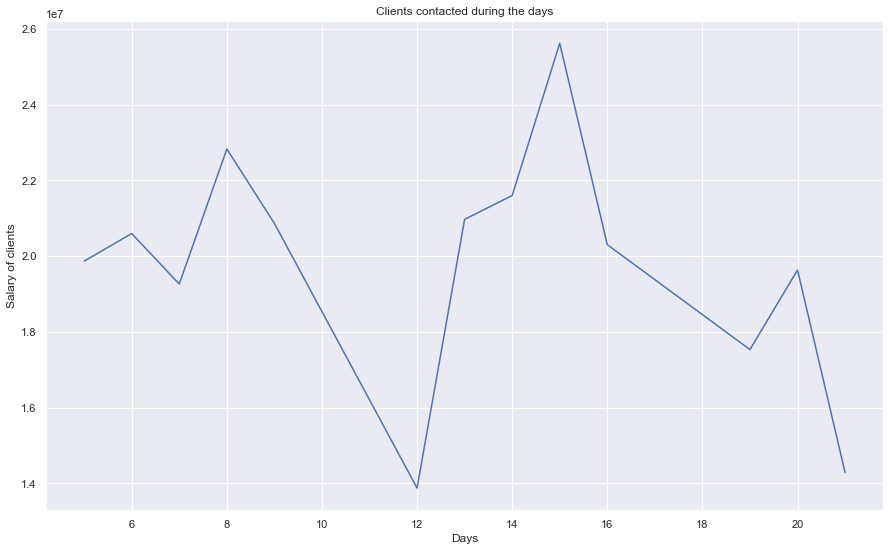

In [23]:
#what is the Game Sales Across the World Throughout the Years?
sns.set(font_scale=1)
plt.figure(figsize=((15,9)))

plt.plot(df.groupby('day').salary.agg(['sum']))

plt.xlabel('Days')
plt.ylabel('Salary of clients')
plt.title("Clients contacted during the days");

Is there a relation between number of campaigns conducted and the response to be positive

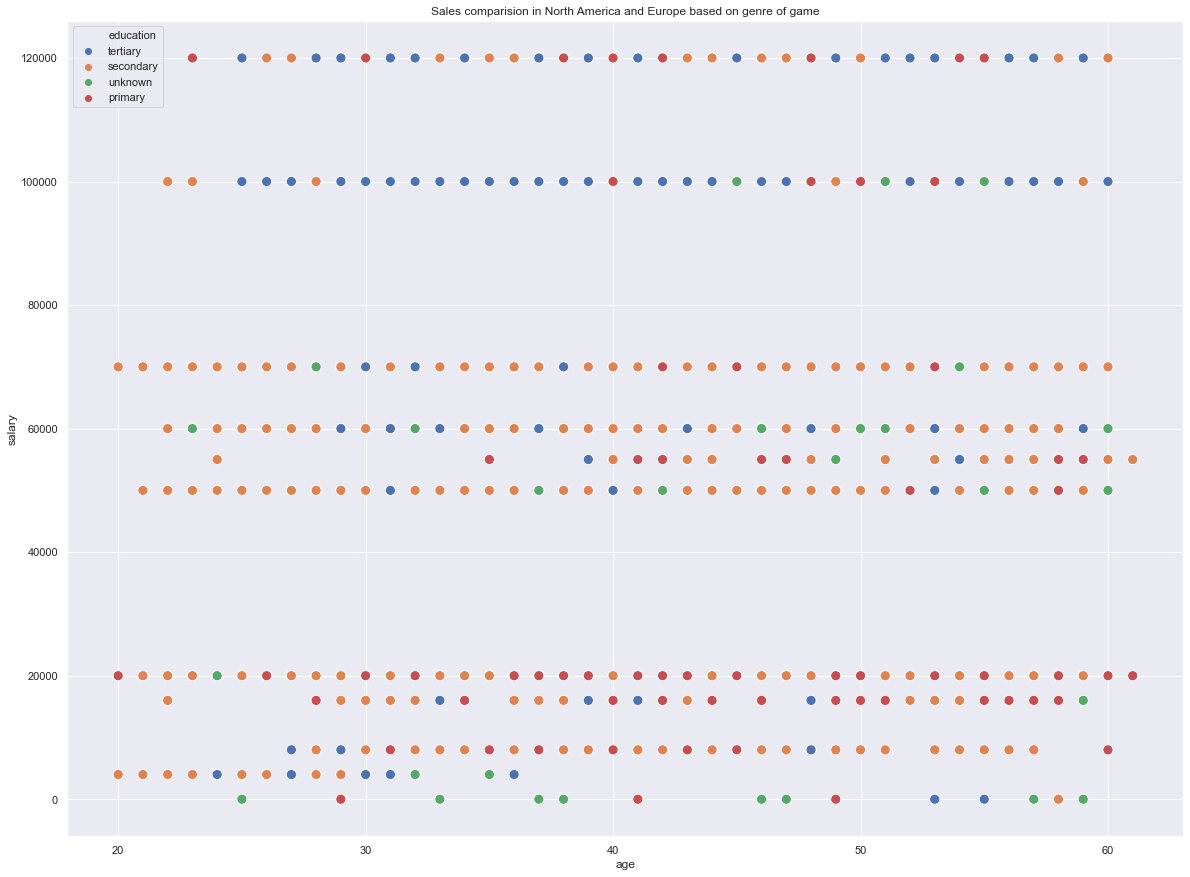

In [24]:
plt.figure(figsize=(20,15))
plt.title("Sales comparision in North America and Europe based on genre of game")

sns.scatterplot(x='age', 
                y='salary', 
                hue='education', 
                s=100,
               data=df);

In [25]:
len(df.duration.unique())

887

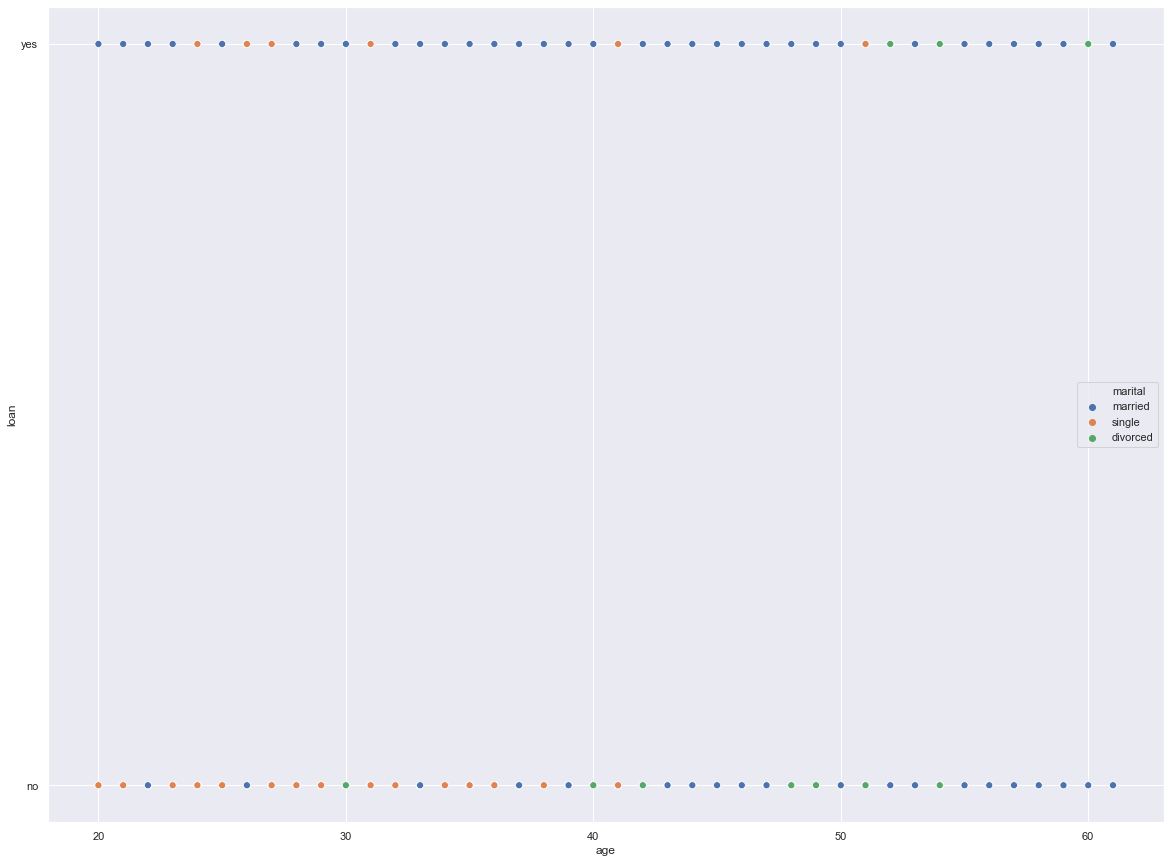

In [31]:
plt.figure(figsize=(20,15))
sns.scatterplot(x='age',y='loan',hue='marital',s=50,data=df);

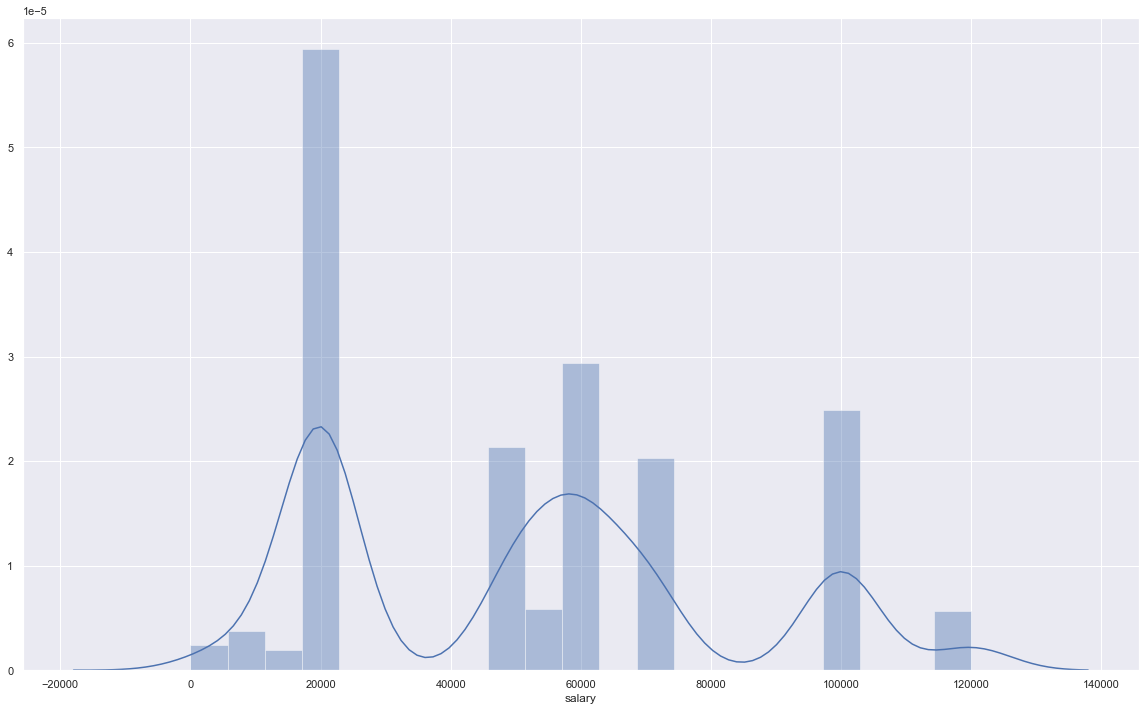

In [34]:
plt.figure(figsize=(20,12))
sns.distplot(df['salary'],kde=True);

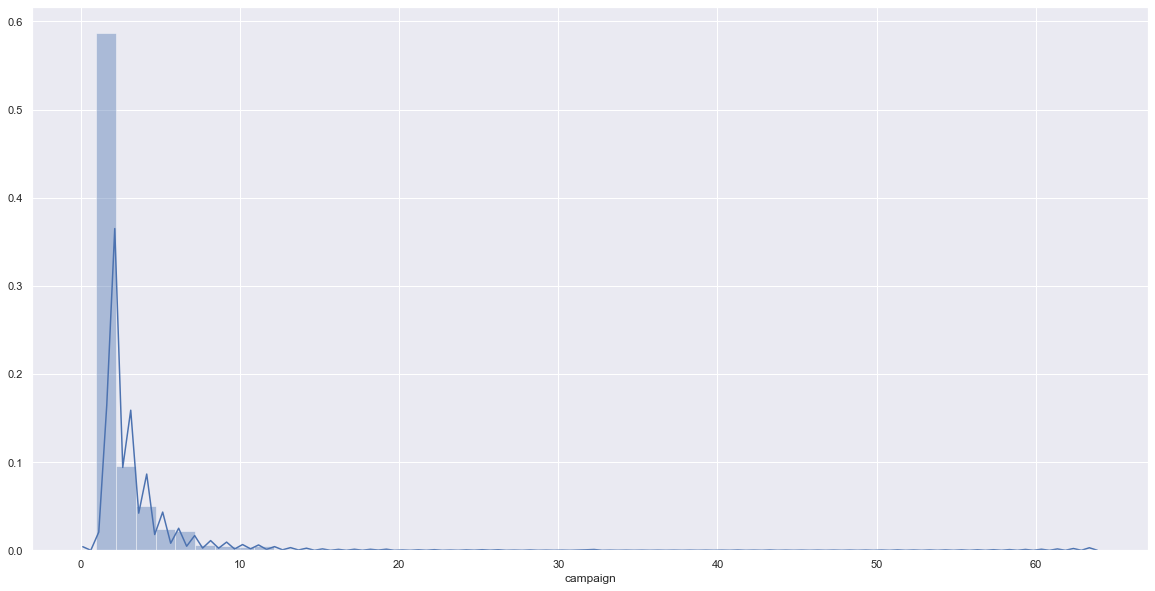

In [33]:
plt.figure(figsize=(20,10))
sns.distplot(df['campaign'],kde=True);

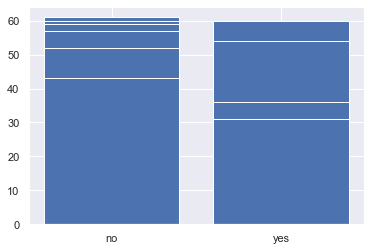

In [29]:
plt.bar(df.response,df.age);